단순 선형 회귀 (Simple Linear Regression)

In [286]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl # 데이터셋 가져올 라이브러리

np.random.seed(42) # 특정 난수 생성기를 쓰겠다 (이후 실험 결과 재현을 위해)

In [287]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv # 파이썬 명령어가 아님; 쉘(환경) 명령어 (쉘 스크립트); web get

--2023-06-28 11:03:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.07s   

2023-06-28 11:03:47 (1012 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [288]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [289]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [290]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


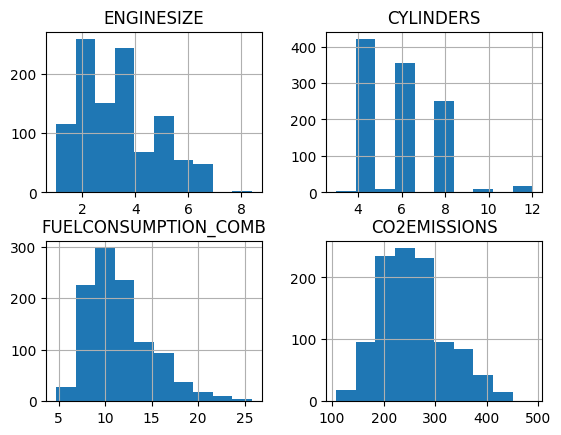

In [291]:
cdf.hist() # pandas 내장된 히스토그램 함수
# matplotlib이나 seaborn보다는 확장성이 떨어짐 = 여러가지 변화/옵션 주기 어려움
plt.show()

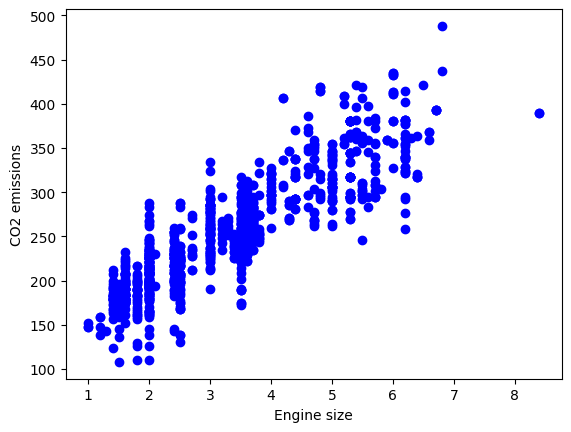

In [292]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 emissions")
plt.show()

In [293]:
# 여기서부터 슬라이드 진도 내용 등장
# 학습 데이터, 검증 데이터 나누기
# 이 나누는 방법(코딩)은 여러가지

mask = np.random.rand(len(df)) < 0.8
# 0에서 1을 범위로 가지는 (균등 분포) 난수를 인자 갯수만큼 생성
# n개만큼 갯수를 0.8에 모두 대소관계 비교 -> broadcasting 성질로 인해
# 각 원소마다 0.8과 비교됨
# less than이 True/False여부를 ndarray로 저장하고 우리가 mask라는 이름을 붙임

# loc을 쓰고자 하면 -> 제일 좋은 경우는 cdf에 이미 True/False라는 칼럼이 있는 경우
# cdf.loc[cdf["Mask"] == True]
train = cdf[mask]
test = cdf[~mask]
# 이렇게 적으면 train:test가 8:2로 나뉨

from sklearn import linear_model # linear_model이라는 서브모듈이 있고,
# 그 안에 여러 모델들이 있음

In [294]:
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
# asanyarray를 하면 numpy array를 상속받은 클래스도 핸들링함

In [295]:
regr = linear_model.LinearRegression() # hubo = Robot()
# car1 = Car()
# my_dog = Dog("Nami")
# scikit-learn을 쓸 때 이 문법에 익숙해지세요
# 사실 tensorflow나 pytorch로 넘어가도 문법이 크게 다르진 않음

In [296]:
regr.fit(train_x, train_y)
# 이 한 줄로 회귀 모델 완성 --> 슬라이드 상에서 theta_0, theta_1 찾음
print(regr.coef_) # coefficient (계수) theta_1
print(regr.intercept_) # 절편 theta_0
# theta_0 + theta_1 * ENGINESIZE = CO2EMISSIONS라는 식

[[39.526118]]
[124.17604844]


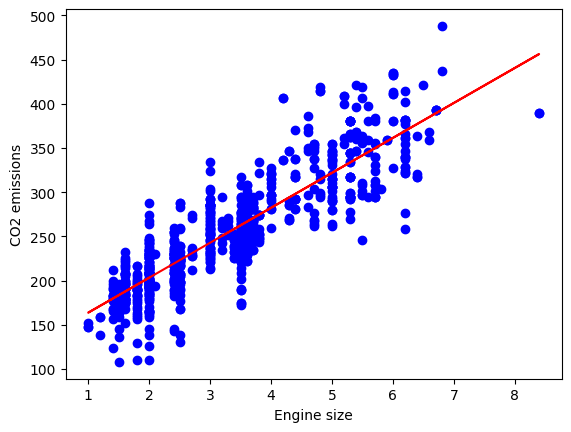

In [297]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') # 빨간색 실선
plt.xlabel("Engine size")
plt.ylabel("CO2 emissions")
plt.show()

In [298]:
# 33번 슬라이드 식을 직접 써보자
x_mean = np.mean(train_x)
y_mean = np.mean(train_y)
x_var1 = np.sum(np.power(train_x - x_mean, 2))/len(train_x) # 분산
x_var2 = np.power(np.std(train_x), 2)
x_var3 = np.var(train_x)
# print(x_var1, x_var2, x_var3)

xy_cov1 = np.sum((train_x-x_mean)*(train_y-y_mean))/len(train_x)

darr = np.concatenate((train_x.T, train_y.T), axis= 0)
print(darr.shape) # (1, n) 배열과 (1, n) 배열을 concat하여 (2, n) 배열로 만듦
xy_cov2_mat = np.cov(darr, bias=True) # train_x, train_y가 한 배열 2D로 있어야 함
### NumPy cov는 공분산 행렬 전체를 row에 대하여 sample 공분산을 반환합니다
### 즉, population 공분산 계산을 위해 bias=True 인자를 줬습니다
### (2, n) 배열에 대해 공분산 행렬이 (2, 2)로 반환되고,
### 이 행렬
### (x,x) (x,y)
### (y,x) (y,y)
### 에서 필요로 하는 (x,y) 값인 xy_cov2[0, 1]을 취하면 됩니다
### 행렬이 대각선 기준 대칭이라 xy_cov2[1, 0]을 취해도 됩니다.
xy_cov2 = xy_cov2_mat[0, 1]
print(xy_cov1, xy_cov2)
# print(xy_cov1, xy_cov2)
theta1 = xy_cov1/x_var3
# xy_cov1랑 xy_cov2 중 아무거나 써도 됨
# x_var1, x_var2, x_var3 중 아무거나 써도 됨
theta0 = y_mean - theta1 * x_mean
print(theta1, theta0)

(2, 848)
78.04157785243859 78.04157785243859
39.52611799730017 124.17604843641695


In [299]:
# 앞서서는 Engine size를 보고 CO2 배출량과의 관계를 선형 회귀로 모델링했다면,

# task 1
# 이번에는 Engine size를 보고, 연료소모량
# 또는 연비 (MPG 붙은 칼럼)와 관계를 모델링해보자
# FUELCONSUMPTION - CITY / HIGHWAY / COMBINED 는 단위거리당 연료 소모량 개념임
# 반면 FUELCONSUMPTION MPG 는 일반적으로 얘기하는 연비 (단위 연료량 당 주행거리)

# task 2
# 다중 선형 회귀
# 연비 예측하는 데 둘 이상의 독립변수를 선정해서 LinearRegression()
# 독립변수 2개부터 먼저 해보기 (나중에 시각화를 위해)

In [300]:
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
print(regr.coef_) # coefficient (계수) theta_1
print(regr.intercept_) # 절편 theta_0

[[2.03608883]]
[4.77797176]


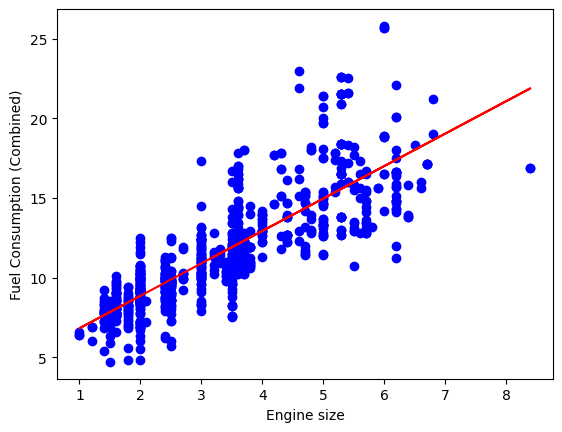

In [301]:
plt.scatter(train.ENGINESIZE, train.FUELCONSUMPTION_COMB, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') # 빨간색 실선
plt.xlabel("Engine size")
plt.ylabel("Fuel Consumption (Combined)")
plt.show()

In [302]:
train_X = np.asanyarray(train[["ENGINESIZE", "CO2EMISSIONS"]])
train_y = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y) # training accuracy?
print(regr.coef_) # coefficient (계수) theta_1, theta_2
print(regr.intercept_) # 절편 theta_0

[[0.42767319 0.04069248]]
[-0.27505922]


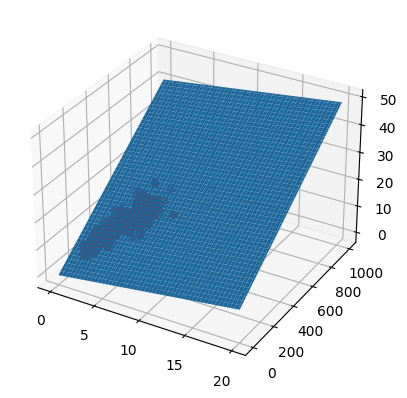

In [303]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X[:, 0], train_X[:, 1], train_y, color="r")
x = np.linspace(0, 20, 100)
y = np.linspace(0, 1000, 100)
x, y = np.meshgrid(x, y)
theta0 = regr.intercept_[0]
theta1 = regr.coef_[0][0]
theta2 = regr.coef_[0][1]
hyperplane = theta0 + theta1 * x + theta2 * y
ax.plot_surface(x, y, hyperplane)
plt.show()

In [304]:
import plotly.express as px
import plotly.graph_objects as go
df = pd.DataFrame({"engine_size": train["ENGINESIZE"], "co2_emissions": train["CO2EMISSIONS"], "fuel_consumption_comb": train["FUELCONSUMPTION_COMB"]})
fig = px.scatter_3d(df, x=df.columns[0], y=df.columns[1], z=df.columns[2])
# 그리고자 하는 3차원 데이터프레임
# x, y, z는 각각 축 이름
fig.add_trace(go.Surface(x=x, y=y, z=hyperplane,  showscale=False))
# 추세면 graph_objects (go) 에 구현되어 있는 Surface(면)
# x랑 y는 위 meshgrid 함수의 반환값

fig.show()

In [305]:
# PolynomialRegression() # 다항 회귀
# "반듯한" 경계선 말고 좀 더 다차원적인 추세선/면을 그려볼 수 있음
# sklearn linear_models PolynomialRegression()
# regr = linear_models.PolynomialRegression()
#